In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from time import time
import seaborn as sns


# import sys
# reload(sys)
# sys.setdefaultencoding('utf8')

In [2]:
holdout = pd.read_excel('sentiment_test.xlsx')

In [3]:
df = pd.read_excel('sentiment_train.xlsx')

In [4]:
holdout['content'] = holdout['content'].apply(str)
df['content'] = df['content'].apply(str)

In [5]:
df.shape

(25191, 2)

In [6]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()


In [7]:
stop = pd.read_fwf('stop.txt',names=['words'])

In [8]:
stopwords.update(set(stop['words'].values))

In [9]:
print (list(stopwords)[:10])

['toward', 'great', 'grouped', "she'll", 'goods', 'also', 'and', 'either', 'with', 'am']


In [10]:
stopwords.update(set(['dont','lot','phone','wa','im','ha','doe','wa', 'able','unlocked','buy']))

In [11]:
len(stopwords)

502

In [12]:
len(stopwords)

502

In [13]:
df.head(1)

,sentiment,content
0,sadness,Funeral ceremony...gloomy friday...


In [14]:
df['content'].count()

25191

In [15]:
sns.countplot(df['sentiment'])


In [16]:

def cleaning(article):
    article = str(article)
    zero = "".join(i for i in article if i not in punctuation)
    
    one = " ".join([i for i in zero.lower().split() if i not in stopwords])
#     one = zero
    
    three = " ".join(lemmatize.lemmatize(i) for i in one.split())
    return three

In [17]:
from collections import defaultdict

In [18]:
freq = defaultdict(int)

In [19]:
for i in stopwords:
    freq[i]+=1

In [20]:
type(freq)

collections.defaultdict

In [21]:
freq['it']

1

### all

In [22]:
all_content = df['content'].append(holdout['content'])

In [23]:
apple = all_content

### choices

In [24]:
start = time()

ap_text = apple.apply(cleaning)
ap_text_list = [i.split() for i in ap_text]
print (len(ap_text_list))

print ('used: {:.2f}s'.format(time()-start))


33500
used: 2.42s


In [25]:
ap_text[:10]

0                        funeral ceremonygloomy friday
1                   dannycastillo trade houston ticket
2    repinging ghostridah14 didnt prom bc bf didnt ...
3    sleep thinking friend he married damn amp 2 sc...
4                                hmmm httpwwwdjherocom
5                         charviray charlene love miss
6                                kelcouch sorry friday
7                                     cant fall asleep
8    brodyjenner watch hill london realise tourture...
9                                                 news
Name: content, dtype: object

In [26]:
from gensim.models.phrases import Phraser, Phrases

C:\Program Files\Anaconda2\envs\py3k\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [27]:
start = time()
phs = Phrases(ap_text_list)
print ('used: {:.2f}s'.format(time()-start))


used: 0.24s


In [28]:
bi_gram = Phraser(phs)

In [29]:
start = time()

new_bi_list = [bi_gram[i] for i in ap_text_list]

print ('used: {:.2f}s'.format(time()-start))


used: 0.44s


In [30]:
bi_gram[ap_text_list[0]]

['funeral', 'ceremonygloomy', 'friday']

In [31]:
new_bi_list[0]

['funeral', 'ceremonygloomy', 'friday']

In [32]:
# start = time()

# phs3=Phrases(new_bi_list)
# tri_gram=Phraser(phs3)

# print ('used: {:.2f}s'.format(time()-start))


In [33]:
# start = time()

# new_tri_list = [tri_gram[i] for i in new_bi_list]

# print ('used: {:.2f}s'.format(time()-start))


In [34]:
new_tri_list = new_bi_list

In [35]:
make_dic = dict()

In [36]:
for i,j in zip(range(len(new_tri_list)), new_tri_list):
    make_dic[i]=j

In [37]:
without_stop = pd.Series(make_dic)

In [38]:
without_stop.head(10)

0                    [funeral, ceremonygloomy, friday]
1              [dannycastillo, trade, houston, ticket]
2    [repinging, ghostridah14, didnt, prom, bc, bf,...
3    [sleep, thinking, friend, he, married, damn, a...
4                             [hmmm, httpwwwdjherocom]
5                    [charviray, charlene, love, miss]
6                            [kelcouch, sorry, friday]
7                                  [cant_fall, asleep]
8    [brodyjenner, watch, hill, london, realise, to...
9                                               [news]
dtype: object

In [39]:
len(without_stop[0])

3

In [40]:
def helper_len(x):
    leng=[0]
    for i in x:
        leng.append(len(i))
    return max(leng)

In [41]:
with_stop = without_stop.apply(helper_len)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
with_stop.value_counts().head(10)

8     4384
9     4322
10    3913
7     3691
12    3413
11    3131
13    2129
6     1872
14    1849
15    1391
dtype: int64

In [44]:
graph = with_stop.value_counts()

<Container object of 58 artists>

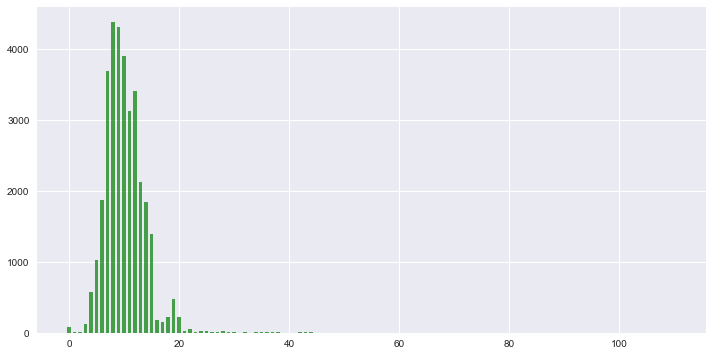

In [45]:
plt.figure(figsize=(12,6))
plt.bar(graph.index, graph.values, .7, color='g', alpha=.7)

In [46]:
without_stop

0                        [funeral, ceremonygloomy, friday]
1                  [dannycastillo, trade, houston, ticket]
2        [repinging, ghostridah14, didnt, prom, bc, bf,...
3        [sleep, thinking, friend, he, married, damn, a...
4                                 [hmmm, httpwwwdjherocom]
5                        [charviray, charlene, love, miss]
6                                [kelcouch, sorry, friday]
7                                      [cant_fall, asleep]
8        [brodyjenner, watch, hill, london, realise, to...
9                                                   [news]
10                              [storm, electricity, gone]
11                                    [sleepy, late, fail]
12       [perezhilton, lady_gaga, tweeted, impressed, v...
13              [convinced, signal, offdamn, lost, friend]
14       [raaaaaaek, oh, bad, hope, ive, sleep, issue, ...
15       [topic, map, talk, balisage, markup, conferenc...
16                                    [ate, telling, foo

In [47]:
ap_text_list = list(without_stop.values)

In [48]:
len(ap_text_list)

33500

In [49]:
ap_text_list[0]

['funeral', 'ceremonygloomy', 'friday']

## topic models

In [50]:
# ! pip install gensim pyLDAvis WordCloud

### change name

In [51]:
# Importing Gensim
import gensim
from gensim import corpora

from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='hw_running120.log',filemode='w')

In [52]:


# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(ap_text_list)
dictionary.save('hw120.dict')
print (dictionary)

Dictionary(44583 unique tokens: ['thehebrican', 'laracasey', 'jonesy', 'retweeting', 'aweee']...)


In [53]:
# gensim.models.ldamodel.LdaModel?

In [54]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in ap_text_list]
corpora.MmCorpus.serialize('hw120.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

33500
[(465, 1), (466, 1), (467, 1)]


In [55]:
# Lda?

In [74]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=36, id2word = dictionary, 
#                passes=5
              )
'used: {:.2f}s'.format(time()-start)

'used: 24.12s'

In [75]:
ldamodel.print_topics()

[(32,
  '0.081*"feel" + 0.034*"doesnt" + 0.027*"funny" + 0.027*"wasnt" + 0.020*"woke" + 0.019*"evening" + 0.015*"perfect" + 0.015*"babe" + 0.015*"meeting" + 0.012*"line"'),
 (24,
  '0.099*"haha" + 0.024*"coffee" + 0.020*"true" + 0.018*"dog" + 0.016*"happy_birthday" + 0.011*"agree" + 0.011*"absolutely" + 0.010*"season" + 0.009*"ticket" + 0.009*"drinking"'),
 (33,
  '0.023*"hahaha" + 0.022*"playing" + 0.021*"cry" + 0.018*"trip" + 0.018*"tv" + 0.013*"mad" + 0.013*"lil" + 0.012*"wedding" + 0.012*"short" + 0.011*"prom"'),
 (3,
  '0.043*"family" + 0.038*"omg" + 0.033*"sound" + 0.032*"finally" + 0.025*"rain" + 0.020*"photo" + 0.016*"seen" + 0.013*"la" + 0.011*"boo" + 0.011*"ahhh"'),
 (12,
  '0.058*"sad" + 0.036*"watch" + 0.029*"car" + 0.027*"mommy" + 0.024*"follower" + 0.016*"headache" + 0.014*"xd" + 0.012*"minute" + 0.012*"hand" + 0.011*"add"'),
 (17,
  '0.170*"thanks" + 0.028*"listening" + 0.026*"loved" + 0.024*"hate" + 0.018*"month" + 0.016*"link" + 0.009*"retrorewind" + 0.007*"star" + 0.0

In [76]:
ldamodel.save('hw120.model')


## load saved model

In [77]:
from gensim.models import LdaModel
loading = LdaModel.load('hw120.model')

## plotting



In [78]:
import pyLDAvis.gensim
import gensim
from time import time
pyLDAvis.enable_notebook()

In [79]:
d = gensim.corpora.Dictionary.load('hw120.dict')
c = gensim.corpora.MmCorpus('hw120.mm')
lda = gensim.models.LdaModel.load('hw120.model')

In [80]:
start = time()

data = pyLDAvis.gensim.prepare(lda, c, d)

print ('used: {:.2f}s'.format(time()-start))

used: 22.59s


In [81]:
pyLDAvis.save_html(data,'hw120.html')



In [82]:
data

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
5      3.858615        1       1  0.158335 -0.201345
14     3.543641        1       2  0.045107  0.139298
6      3.339528        1       3  0.111956  0.042536
35     3.272805        1       4  0.253702  0.040609
13     3.026532        1       5 -0.004230 -0.115514
9      3.023744        1       6 -0.041877 -0.143166
16     2.943275        1       7 -0.042192  0.041259
29     2.938607        1       8  0.042966 -0.107644
7      2.933453        1       9  0.076556  0.013300
2      2.878721        1      10 -0.014664 -0.030949
15     2.821044        1      11 -0.027292  0.038408
4      2.809997        1      12 -0.036857  0.087568
20     2.782277        1      13 -0.068928  0.044979
19     2.779219        1      14 -0.052895 -0.023720
26     2.736311        1      15 -0.021854 -0.054779
11     2.723665        1      16  0.130781  0.032065
18     2.702405        1      17  0.019670  0.054131
0      2.700056        1      18 -0.084561 -0.049666
24     2.699610        1      19 -0.092025 -0.010107
27     2.693738        1      20 -0.023579 -0.044915
8      2.677604        1      21 -0.037821 -0.005869
31     2.612663        1      22 -0.059606 -0.024591
23     2.610856        1      23 -0.012879 -0.053345
22     2.606479        1      24 -0.023267 -0.014157
21     2.603996        1      25 -0.042442 -0.020255
12     2.600017        1      26 -0.023665  0.036324
10     2.581153        1      27  0.029335  0.077142
3      2.563272        1      28 -0.002904  0.070365
28     2.561060        1      29  0.116580  0.055440
30     2.511046        1      30  0.004786 -0.006925
32     2.500732        1      31 -0.066290  0.045795
34     2.500675        1      32 -0.015899 -0.024337
25     2.499398        1      33 -0.068252 -0.002469
1      2.475093        1      34 -0.014669 -0.000500
17     2.463821        1      35 -0.052741  0.073468
33     2.424893        1      36 -0.058385  0.041566, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
1564   Default  1521.000000          love  1521.000000  30.0000  30.0000
5365   Default   950.000000           lol   950.000000  29.0000  29.0000
4631   Default   822.000000        thanks   822.000000  28.0000  28.0000
27087  Default   753.000000         night   753.000000  27.0000  27.0000
22652  Default  2366.000000           day  2366.000000  26.0000  26.0000
14949  Default   740.000000           amp   740.000000  25.0000  25.0000
8622   Default  1033.000000  happy_mother  1033.000000  24.0000  24.0000
22151  Default   624.000000       morning   624.000000  23.0000  23.0000
33166  Default   547.000000       twitter   547.000000  22.0000  22.0000
37199  Default   581.000000          haha   581.000000  21.0000  21.0000
39964  Default   529.000000         thats   529.000000  20.0000  20.0000
29746  Default   493.000000         happy   493.000000  19.0000  19.0000
27248  Default   561.000000             2   561.000000  18.0000  18.0000
37565  Default   572.000000          hope   572.000000  17.0000  17.0000
41038  Default   444.000000           mom   444.000000  16.0000  16.0000
21005  Default   401.000000          feel   401.000000  15.0000  15.0000
27011  Default   407.000000          nice   407.000000  14.0000  14.0000
29409  Default   438.000000        friend   438.000000  13.0000  13.0000
14874  Default   397.000000       awesome   397.000000  12.0000  12.0000
25015  Default   397.000000          yeah   397.000000  11.0000  11.0000
41671  Default   378.000000      watching   378.000000  10.0000  10.0000
21323  Default   373.000000           yes   373.000000   9.0000   9.0000
33489  Default   427.000000          week   427.000000   8.0000   8.0000
11842  Default   404.000000         didnt   404.000000   7.0000   7.0000
16727  Default   377.000000          look   3

## wordcloud